In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import pymc3 as pm
import statsmodels.api as sm
from statsmodels.tools import add_constant
from itertools import combinations
from sklearn.model_selection import train_test_split

In [2]:
###################################################
#### Exploration

In [3]:
df = pd.read_csv('/Users/sethgalluzzi/Downloads/movies.csv')

In [4]:
df.head(1).T

,0
Unnamed: 0,1
title,Filly Brown
title_type,Feature Film
genre,Drama
runtime,80.0
mpaa_rating,R
studio,Indomina Media Inc.
thtr_rel_year,2013
thtr_rel_month,4
thtr_rel_day,19


In [5]:
df_clean = df[['title','title_type','genre','runtime','mpaa_rating',
              'thtr_rel_year','thtr_rel_month','thtr_rel_day',
              'imdb_rating','imdb_num_votes','critics_rating', 
              'critics_score', 'audience_rating', 'audience_score',
              'best_pic_nom', 'best_pic_win','best_actor_win','best_actress_win',
              'best_dir_win','top200_box']]

In [6]:
df_clean['top200_box'].value_counts()

no     636
yes     15
Name: top200_box, dtype: int64

In [7]:
df_clean.describe()

,runtime,thtr_rel_year,thtr_rel_month,thtr_rel_day,imdb_rating,imdb_num_votes,critics_score,audience_score
count,650.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000,651.000000
mean,105.821538,1997.941628,6.740399,14.416283,6.493088,57532.983103,57.688172,62.362519
std,19.445047,10.974501,3.554223,8.861167,1.084747,112124.386910,28.402971,20.222624
min,39.000000,1970.000000,1.000000,1.000000,1.900000,180.000000,1.000000,11.000000
25%,92.000000,1990.000000,4.000000,7.000000,5.900000,4545.500000,33.000000,46.000000
50%,103.000000,2000.000000,7.000000,15.000000,6.600000,15116.000000,61.000000,65.000000
75%,115.750000,2007.000000,10.000000,21.000000,7.300000,58300.500000,83.000000,80.000000
max,267.000000,2014.000000,12.000000,31.000000,9.000000,893008.000000,100.000000,97.000000


In [8]:
features = df.loc[df['title_type'] == 'Feature Film']



features['genre'].value_counts()

Drama                        301
Comedy                        85
Action & Adventure            65
Mystery & Suspense            59
Horror                        23
Other                         15
Art House & International     14
Animation                      9
Science Fiction & Fantasy      9
Musical & Performing Arts      8
Documentary                    3
Name: genre, dtype: int64

In [9]:
df['critics_rating'].value_counts()

Rotten             307
Fresh              209
Certified Fresh    135
Name: critics_rating, dtype: int64

In [10]:
df.corr()

,Unnamed: 0,runtime,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_score,audience_score
Unnamed: 0,1.000000,-0.040722,-0.003676,-0.002700,0.038116,-0.006841,-0.013576,0.028463,0.017521,0.021794,-0.011316,0.011352
runtime,-0.040722,1.000000,-0.104377,0.220987,0.037396,-0.081902,-0.033309,0.024235,0.268240,0.347215,0.172499,0.180963
thtr_rel_year,-0.003676,-0.104377,1.000000,-0.000507,0.107400,0.660465,0.036678,-0.003763,-0.030003,0.155906,-0.080785,-0.054079
thtr_rel_month,-0.002700,0.220987,-0.000507,1.000000,0.116228,-0.009989,-0.168612,0.028240,0.072278,0.106326,0.032404,0.032690
thtr_rel_day,0.038116,0.037396,0.107400,0.116228,1.000000,0.041322,-0.025531,0.001797,0.021891,0.067976,0.013689,0.019221
dvd_rel_year,-0.006841,-0.081902,0.660465,-0.009989,0.041322,1.000000,-0.006506,-0.068134,-0.015263,0.093711,0.015212,-0.062970
dvd_rel_month,-0.013576,-0.033309,0.036678,-0.168612,-0.025531,-0.006506,1.000000,-0.030141,0.064806,0.030912,0.031070,0.057349
dvd_rel_day,0.028463,0.024235,-0.003763,0.028240,0.001797,-0.068134,-0.030141,1.000000,0.026912,-0.016419,-0.024228,0.021644
imdb_rating,0.017521,0.268240,-0.030003,0.072278,0.021891,-0.015263,0.064806,0.026912,1.000000,0.331152,0.765036,0.864865
imdb_num_votes,0.021794,0.347215,0.155906,0.106326,0.067976,0.093711,0.030912,-0.016419,0.331152,1.000000,0.209251,0.289813


In [11]:
df['title_type'].value_counts()

Feature Film    591
Documentary      55
TV Movie          5
Name: title_type, dtype: int64

In [12]:
from sklearn.linear_model import LinearRegression as lm

In [46]:
dfsub = df.loc[:, df.columns != 'audience_score']

In [15]:
dfaud = df[["audience_score"]]


In [47]:
model = lm.fit(dfsub, dfaud)

TypeError: fit() missing 1 required positional argument: 'y'

Text(0.5, 1.0, 'Audience Score Histogram')

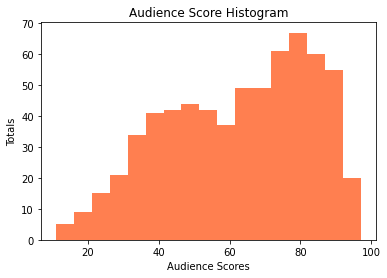

In [19]:
plt.hist(df['audience_score'], bins =17, color= 'coral')
plt.ylabel('Totals')
plt.xlabel('Audience Scores')
plt.title('Audience Score Histogram')

Text(0.5, 1.0, 'Audience Score Scatterplot')

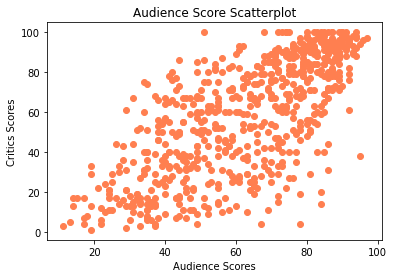

In [20]:
plt.scatter(df['audience_score'], df['critics_score'], color= 'coral')
plt.ylabel('Critics Scores')
plt.xlabel('Audience Scores')
plt.title('Audience Score Scatterplot')

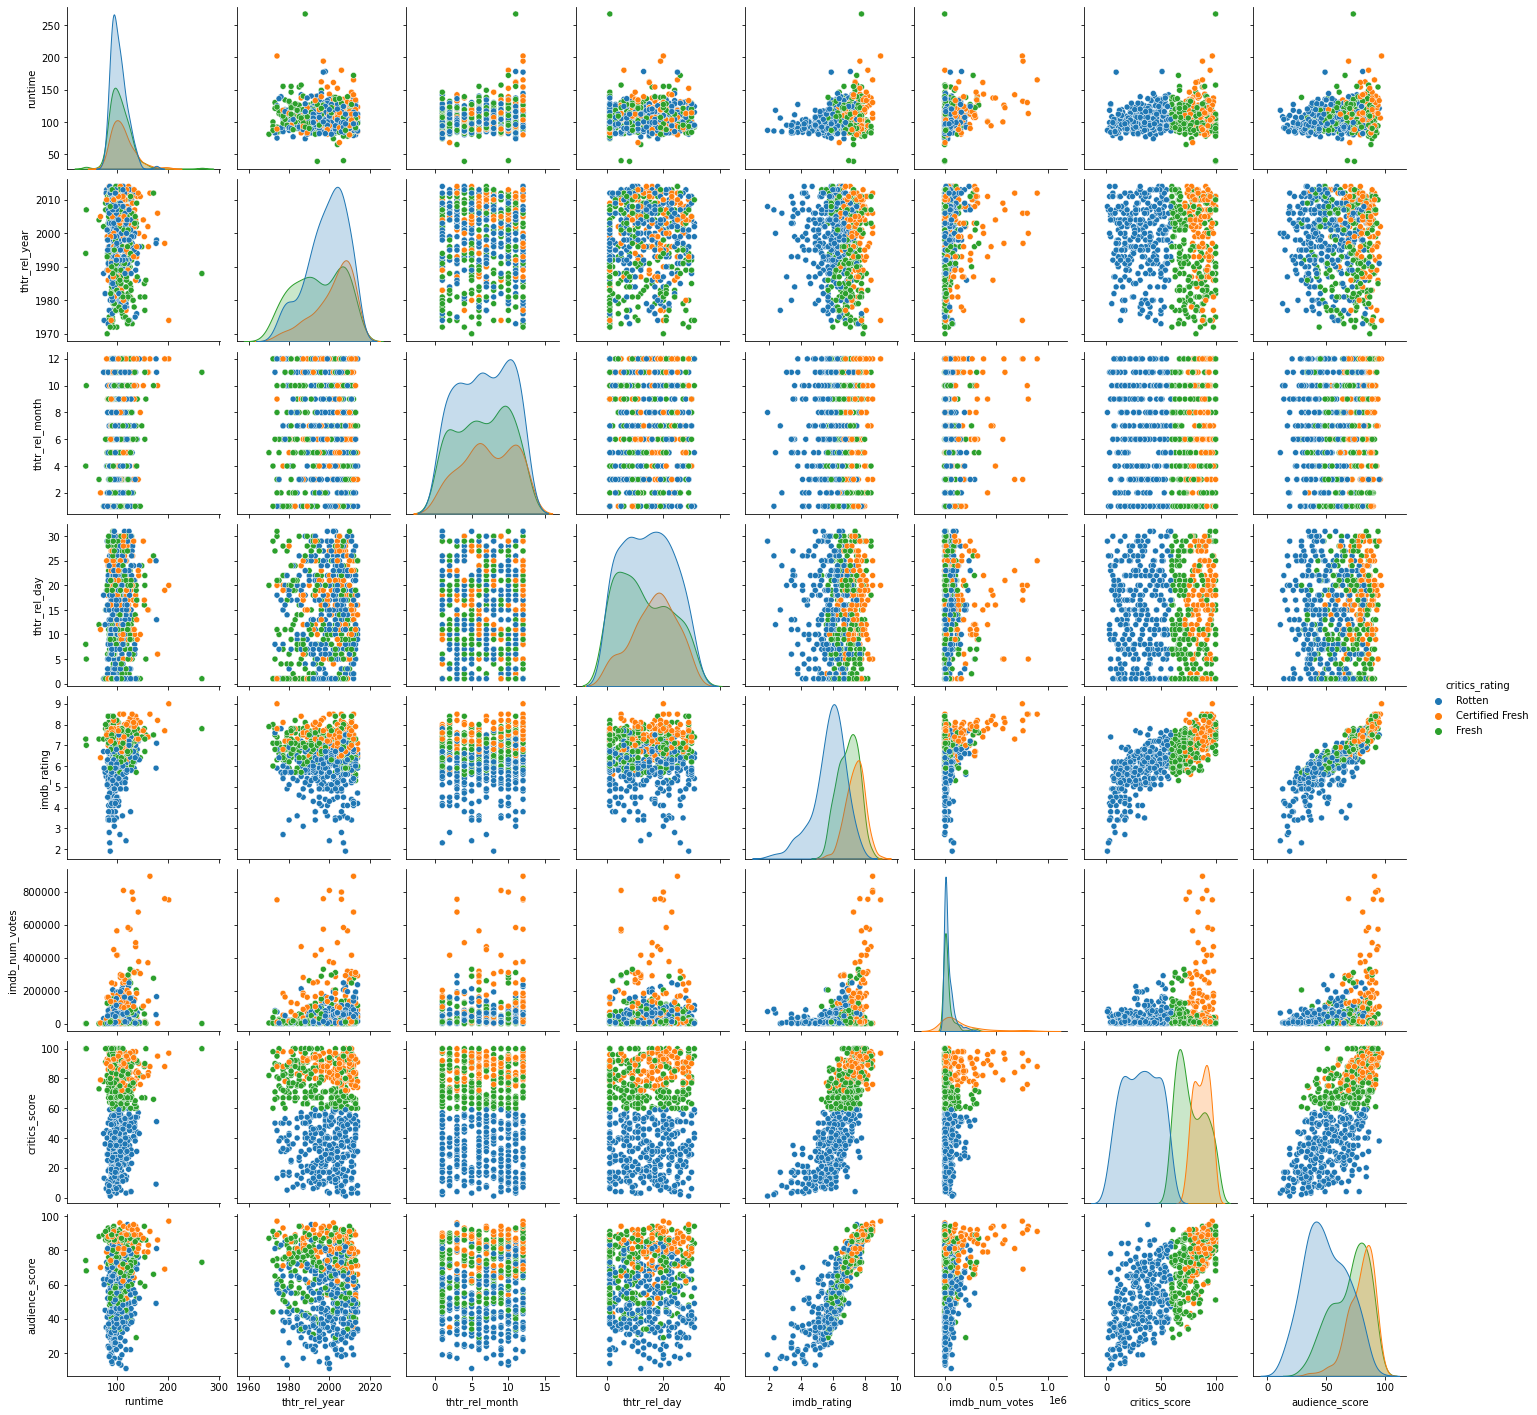

In [21]:
#df_sub= df_clean['critics_score', 'audience_score']


sns.pairplot(df_clean, hue = 'critics_rating')

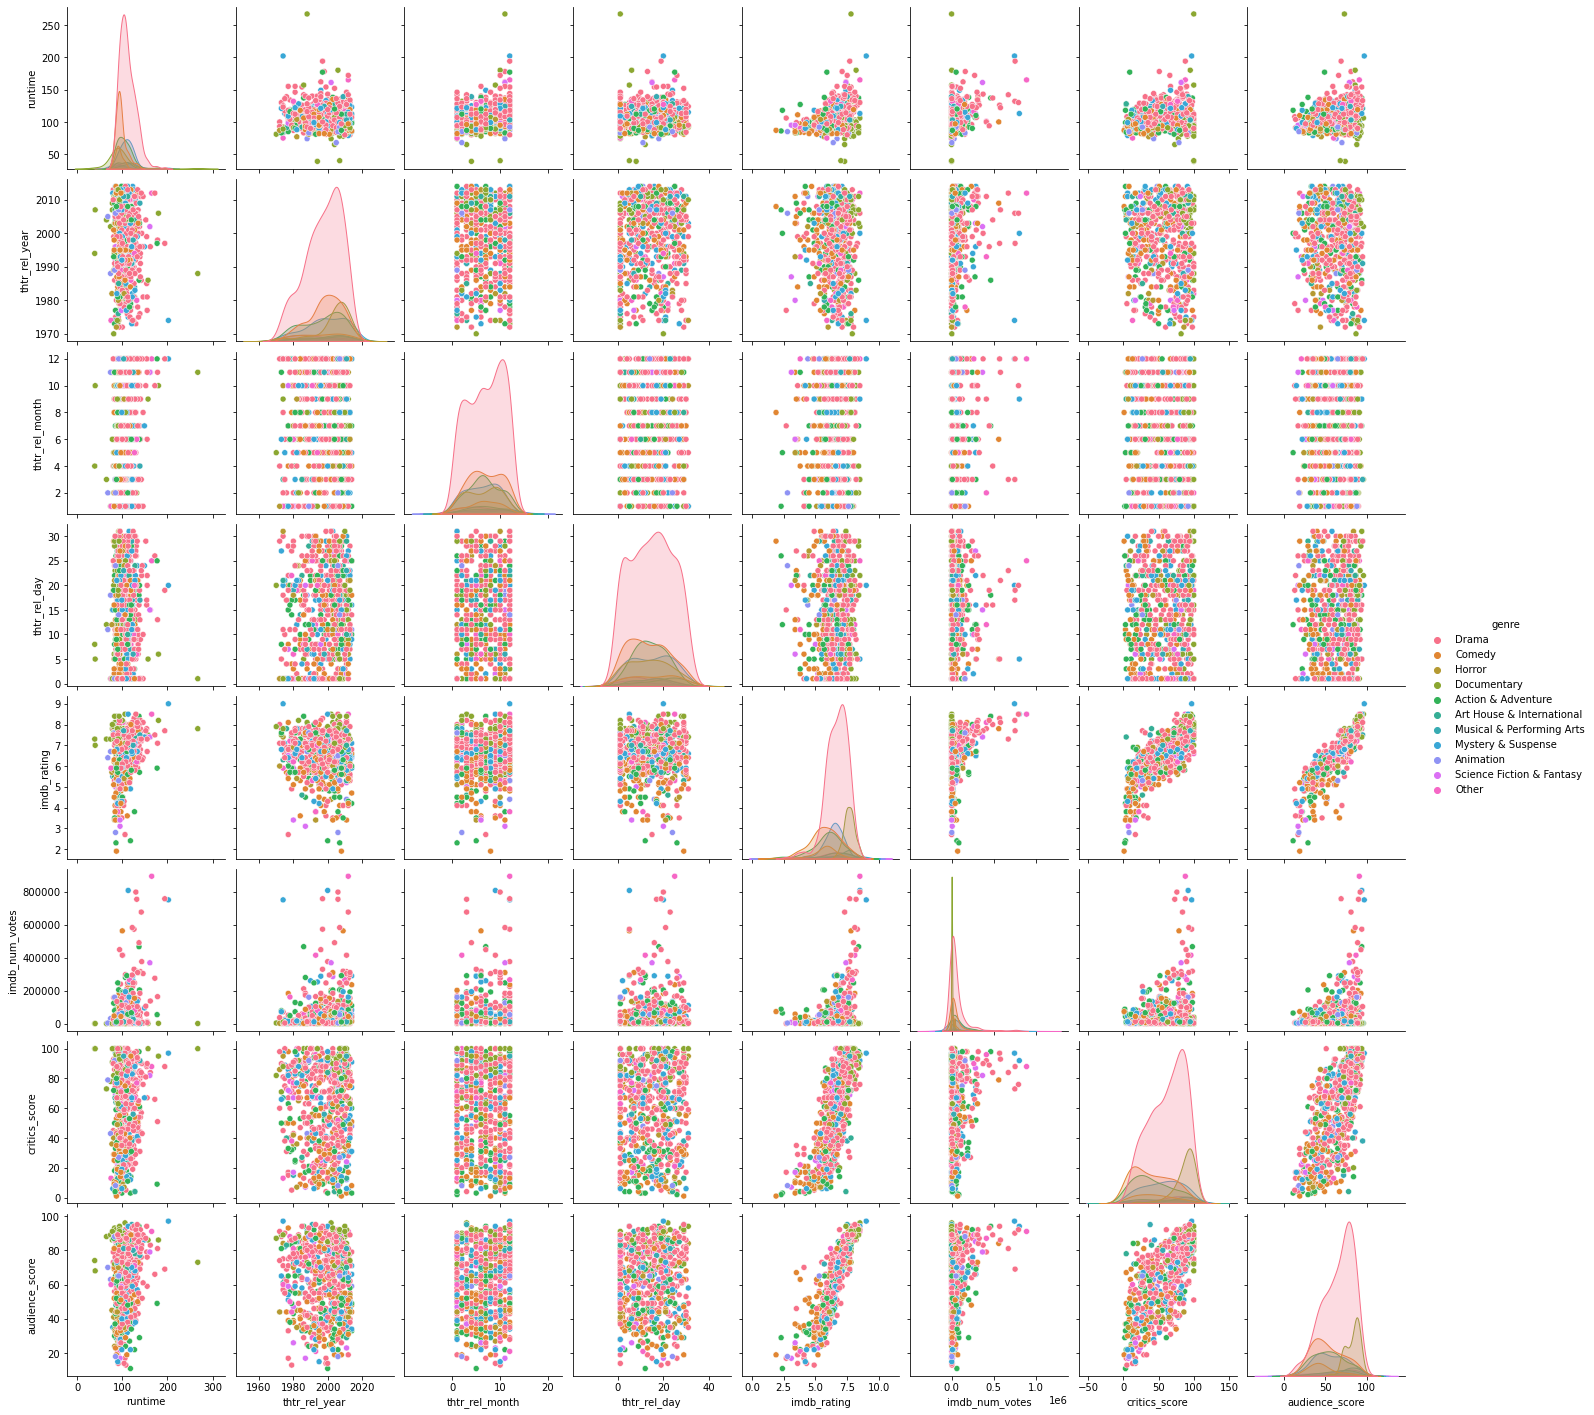

In [22]:
sns.pairplot(df_clean, hue = 'genre')

In [ ]:
df_studio = df_clean['studio'].value_counts()

In [ ]:
df_studio.head(20)

<AxesSubplot:xlabel='thtr_rel_month'>

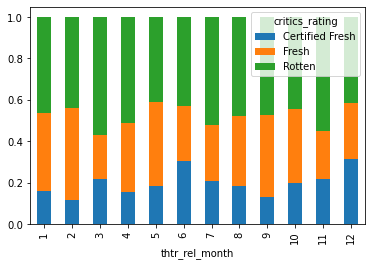

In [48]:
(pd.crosstab(df['thtr_rel_month'],df['critics_rating'],
             normalize='index')
   .plot.bar(stacked=True))

In [ ]:
##################################### 
####BAYESIAN LOGISTIC REGRESSION CLASSIFICATION

### This needs cleaned up and need to identify best variable options.  
### Possibly build from this by adding month and seeing if the model improves??

In [49]:
import pymc3 as pm
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
def plot_traces(traces, retain=0):
    '''
    Convenience function:
    Plot traces with overlaid means and values
    '''

    ax = pm.traceplot(traces[-retain:],
                      lines=tuple([(k, {}, v['mean'])
                                   for k, v in pm.summary(traces[-retain:]).iterrows()]))

    for i, mn in enumerate(pm.summary(traces[-retain:])['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data'
                    ,xytext=(5,10), textcoords='offset points', rotation=90
                    ,va='bottom', fontsize='large', color='#AA0022')

In [185]:
data = pd.read_csv('/Users/sethgalluzzi/Downloads/movies.csv')
data = data[['audience_score','critics_score','imdb_rating','thtr_rel_month','runtime','critics_rating']]
print(np.unique(data['critics_rating']))
data.describe()

['Certified Fresh' 'Fresh' 'Rotten']


,audience_score,critics_score,imdb_rating,thtr_rel_month,runtime
count,651.000000,651.000000,651.000000,651.000000,650.000000
mean,62.362519,57.688172,6.493088,6.740399,105.821538
std,20.222624,28.402971,1.084747,3.554223,19.445047
min,11.000000,1.000000,1.900000,1.000000,39.000000
25%,46.000000,33.000000,5.900000,4.000000,92.000000
50%,65.000000,61.000000,6.600000,7.000000,103.000000
75%,80.000000,83.000000,7.300000,10.000000,115.750000
max,97.000000,100.000000,9.000000,12.000000,267.000000


In [52]:
data['critics_rating'].describe()

count        651
unique         3
top       Rotten
freq         307
Name: critics_rating, dtype: object

In [53]:
data['critics_rating'].value_counts()

Rotten             307
Fresh              209
Certified Fresh    135
Name: critics_rating, dtype: int64

In [54]:
data.loc[data['critics_rating'] == 'Rotten',:].mean()*10

audience_score    497.035831
critics_score     314.788274
dtype: float64

In [55]:
data.loc[data['critics_rating'] == 'Fresh',:].mean()*10

audience_score    699.712919
critics_score     773.444976
dtype: float64

In [56]:
data.loc[data['critics_rating'] == 'Certified Fresh',:].mean()*10

audience_score    793.703704
critics_score     868.592593
dtype: float64

In [57]:
 data.loc[data['critics_rating'] == 'Rotten',:].cov()*10

,audience_score,critics_score
audience_score,3198.497584,1242.175598
critics_score,1242.175598,2531.000405


In [58]:
 data.loc[data['critics_rating'] == 'Fresh',:].cov()*10

,audience_score,critics_score
audience_score,2449.607103,945.099374
critics_score,945.099374,1603.999816


In [59]:
 data.loc[data['critics_rating'] == 'Certified Fresh',:].cov()*10

,audience_score,critics_score
audience_score,1242.349364,386.420674
critics_score,386.420674,525.695965


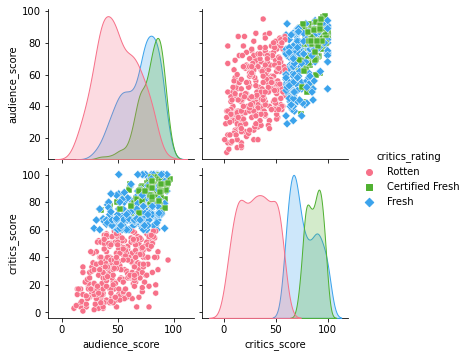

In [60]:
g = sns.pairplot(data, hue="critics_rating", palette="husl", markers=["o", "s", "D"])

In [61]:
cont_prior = pm.Normal.dist(mu = 0 , sd = 1)
disc_prior = pm.Beta.dist(alpha=1, beta= 1)

In [186]:
for key in data.keys()[0:5]:
    try:
        print("Standardizing "+key+".")
        data[key] = data[key] - np.mean(data[key])
        data[key] = data[key] / np.std(data[key])
    except:
        print("Predictor "+key+" cannot be standardized (probably a categorical variable).")
data.describe()

Standardizing audience_score.
Standardizing critics_score.
Standardizing imdb_rating.
Standardizing thtr_rel_month.
Standardizing runtime.


,audience_score,critics_score,imdb_rating,thtr_rel_month,runtime
count,6.510000e+02,6.510000e+02,6.510000e+02,6.510000e+02,6.500000e+02
mean,5.252668e-17,2.387576e-18,-3.451071e-15,-1.108518e-18,-2.784098e-16
std,1.000769e+00,1.000769e+00,1.000769e+00,1.000769e+00,1.000770e+00
min,-2.541807e+00,-1.997388e+00,-4.237505e+00,-1.616334e+00,-3.439076e+00
25%,-8.097416e-01,-8.698793e-01,-5.471726e-01,-7.716191e-01,-7.113473e-01
50%,1.305226e-01,1.166911e-01,9.863562e-02,7.309620e-02,-1.452149e-01
75%,8.728364e-01,8.918536e-01,7.444438e-01,9.178115e-01,5.109840e-01
max,1.714125e+00,1.490843e+00,2.312835e+00,1.480955e+00,8.295305e+00


In [187]:
with pm.Model() as model:
    pm.glm.GLM.from_formula(formula = 'critics_rating ~ audience_score + runtime', 
                            data = data, 
                            family = pm.glm.families.Binomial())

    trace = pm.sample(1000)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/opt/homebrew/anaconda3/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [runtime, audience_score, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.


In [140]:
trace.varnames

['Intercept', 'audience_score', 'thtr_rel_month']

In [188]:
pm.summary(trace).round(2)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-0.10,0.10,-0.28,0.08,0.0,0.0,5150.0,3149.0,1.0
audience_score,-1.61,0.12,-1.85,-1.38,0.0,0.0,5024.0,2841.0,1.0
runtime,-0.03,0.10,-0.22,0.16,0.0,0.0,5096.0,2917.0,1.0


Got error No model on context stack. trying to find log_likelihood in translation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
<ipython-input-50-a0a3ca873737>:7: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  ax = pm.traceplot(traces[-retain:],
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you

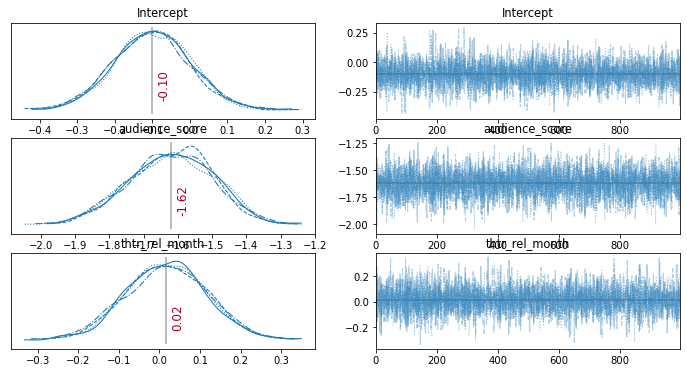

In [142]:
plot_traces(trace)

<ipython-input-143-6a7c3da10413>:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.plots.forestplot(trace, figsize=(12, 5))
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


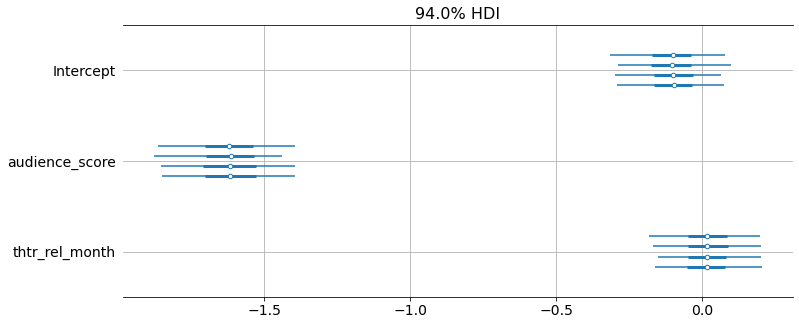

In [143]:
pm.plots.forestplot(trace, figsize=(12, 5))
# The creates a matplotlib plot, so we can modify with standard matplotlib commands
plt.grid()

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 648x504 with 0 Axes>

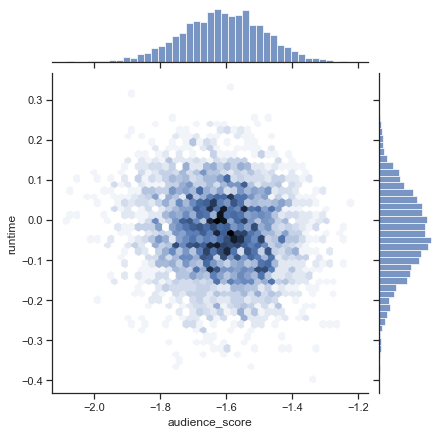

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 648x504 with 0 Axes>

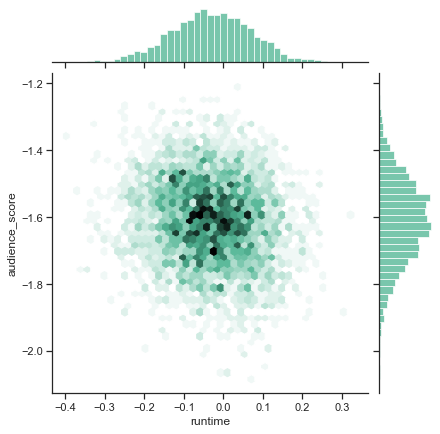

In [189]:
#### Same graph flipped
plt.figure(figsize=(9,7))
sns.jointplot(trace['audience_score'], trace['runtime'], 
              kind="hex")
plt.xlabel("audience_score")
plt.ylabel('runtime');
plt.show()

plt.figure(figsize=(9,7))
sns.jointplot(trace['runtime'], trace['audience_score'], kind="hex", color="#4CB391")
plt.xlabel('runtime')
plt.ylabel("audience_score");
plt.show()

In [26]:
##############################################

In [27]:
##### Other EXPLORATION

Text(0.5, 1.0, 'Critics Score Histogram')

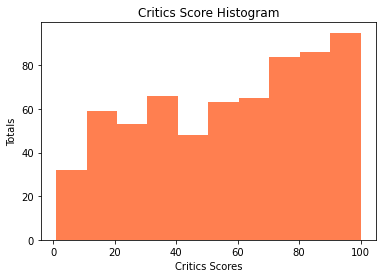

In [145]:
plt.hist(df['critics_score'], bins = 10, color= 'coral')
plt.ylabel('Totals')
plt.xlabel('Critics Scores')
plt.title('Critics Score Histogram')

In [68]:
df_counts = df['audience_score'].value_counts()

In [30]:
##### LDA QDA ?? PROBABLY NOT NEEDED?

In [69]:
class LDA():
    def __init__(self, dataset, class_var, priors = None):
        n_class = len(dataset[class_var].unique())
        if priors is None:
            priors = np.repeat(1/n_class, n_class)
        self.priors =  np.asarray(priors)
        self.means = dataset.groupby(class_var).mean()
        self.sigma = dataset.cov()
        self.class_var = class_var
        self.training_data = dataset
    def predict_probs(self, data = None):
        if data is None:
            data = self.training_data
        data_temp = data.drop(self.class_var, axis = 1)
        dens_list = []
        col_names = []
        for ind, row in self.means.iterrows():
            col_names.append(ind)
            dens_list.append(multivariate_normal.pdf(data_temp, mean = np.asarray(row), cov = self.sigma))
        dens_list = pd.DataFrame(np.transpose(np.vstack(dens_list)),columns= col_names)
        dens_list = dens_list.mul(self.priors, axis=1)
        dens_list = dens_list.div(dens_list.sum(axis=1), axis=0)
        dens_list['True Class'] = data[self.class_var]
        return dens_list 
    def predict_MAP(self, data = None):        
        if data is None:
            data = self.training_data
        dens_list = self.predict_probs(data).drop('True Class', axis = 1)
        map_list = dens_list.idxmax(axis = 1)
        maps = {'MAP Class': map_list}
        maps = pd.DataFrame(maps)
        maps['True Class'] = data[self.class_var]
        return maps
    def misclass_rate(self, data = None):
        if data is None:
            data = self.training_data
        maps = self.predict_MAP(data = data)
        
        
        maps['Mis_class'] = maps['MAP Class']  == maps['True Class']
        
        mis_class =  1 - maps['Mis_class'].mean()
        
        return mis_class
    def misclass_xtabs(self, data = None):
        if data is None:
            data = self.training_data
        maps = self.predict_MAP(data = data)
        
        xtabs = pd.crosstab(maps['MAP Class'], maps['True Class'])        
        return xtabs
    def misclass_pairplot(self, data = None):
        if data is None:
            data = self.training_data
        maps = self.predict_MAP(data = data)
        temp_dat = data.copy(deep = True)
        temp_dat['Mis-Classified'] = maps['MAP Class']  != maps['True Class']
        plot = sns.pairplot(temp_dat,hue="Mis-Classified", height = 1.5, aspect = 1.5)   
        return plot

In [70]:
df.head()

,Unnamed: 0,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,...,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url,good_or_bad
0,1,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,...,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/,0
1,2,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,...,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/,1
2,3,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,...,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/,1
3,4,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,...,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/,1
4,5,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,...,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/,0


In [33]:
df2 = df

In [71]:
m = {'Rotten':0,'Fresh':1,'Certified Fresh':1}
df2['good_or_bad'] = df2['critics_rating'].apply(lambda x :m[x])


In [72]:
df2.head(1).T

,0
Unnamed: 0,1
title,Filly Brown
title_type,Feature Film
genre,Drama
runtime,80.0
mpaa_rating,R
studio,Indomina Media Inc.
thtr_rel_year,2013
thtr_rel_month,4
thtr_rel_day,19


In [73]:
df2['good_or_bad'].describe()

count    651.000000
mean       0.528418
std        0.499576
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: good_or_bad, dtype: float64

In [146]:
df_clean = df2[['critics_score', 'audience_score','imdb_rating','thtr_rel_month','good_or_bad']]

In [147]:
for key in df_clean.keys()[0:4]:
    try:
        print("Standardizing "+key+".")
        df_clean[key] = df_clean[key] - np.mean(df_clean[key])
        df_clean[key] = df_clean[key] / np.std(df_clean[key])
    except:
        print("Predictor "+key+" cannot be standardized (probably a categorical variable).")
df_clean.describe()

Standardizing critics_score.
Standardizing audience_score.
Standardizing imdb_rating.
Standardizing thtr_rel_month.


<ipython-input-147-8cfe0e59bd34>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[key] = df_clean[key] - np.mean(df_clean[key])
<ipython-input-147-8cfe0e59bd34>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[key] = df_clean[key] / np.std(df_clean[key])


,critics_score,audience_score,imdb_rating,thtr_rel_month,good_or_bad
count,6.510000e+02,6.510000e+02,6.510000e+02,6.510000e+02,651.000000
mean,2.387576e-18,5.252668e-17,-3.451071e-15,-1.108518e-18,0.528418
std,1.000769e+00,1.000769e+00,1.000769e+00,1.000769e+00,0.499576
min,-1.997388e+00,-2.541807e+00,-4.237505e+00,-1.616334e+00,0.000000
25%,-8.698793e-01,-8.097416e-01,-5.471726e-01,-7.716191e-01,0.000000
50%,1.166911e-01,1.305226e-01,9.863562e-02,7.309620e-02,1.000000
75%,8.918536e-01,8.728364e-01,7.444438e-01,9.178115e-01,1.000000
max,1.490843e+00,1.714125e+00,2.312835e+00,1.480955e+00,1.000000


In [116]:
print("Mean for Good:")
print(np.array([df_clean[df_clean.good_or_bad == 1].mean()[0:8]]))
print("Mean for Bad:")
print(np.array([df_clean[df_clean.good_or_bad == 0].mean()[0:8]]))

Mean for Good:
[[0.82414977 0.55907934 0.58460092 1.        ]]
Mean for Bad:
[[-0.92347726 -0.62646024 -0.65505771  0.        ]]


In [148]:
continuous_prior = pm.Normal.dist(mu=0, sd=1)
discrete_prior = pm.Beta.dist(alpha=1, beta=1)

priors = {
    'thtr_rel_month' : continuous_prior,
    'audience_score' : continuous_prior,
    'good_or_bad' : discrete_prior,
}

In [149]:
with pm.Model() as model:
    pm.glm.GLM.from_formula(formula = 'good_or_bad ~ thtr_rel_month + audience_score', 
                            data = df_clean, 
                            family = pm.glm.families.Binomial(),
                           priors = priors)

    #trace = pm.sample(5000) 
    approx = pm.fit(50000, method = 'advi')

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/


Finished [100%]: Average Loss = 326.27


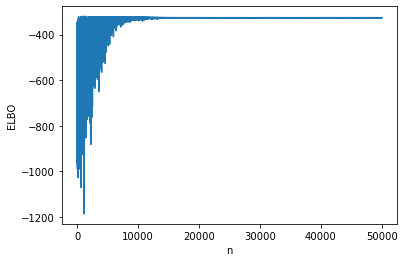

In [150]:
advi_elbo = pd.DataFrame(
    {'ELBO': -approx.hist,
     'n': np.arange(approx.hist.shape[0])})

_ = sns.lineplot(y='ELBO', x='n', data=advi_elbo)

In [151]:
trace_VI = approx.sample(draws=5000)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
arviz - WARNING - Shape validation failed: input_shape: (1, 5000), minimum_shape: (chains=2, draws=4)
<ipython-input-50-a0a3ca873737>:7: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  ax = pm.traceplot(traces[-retain:],
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in 

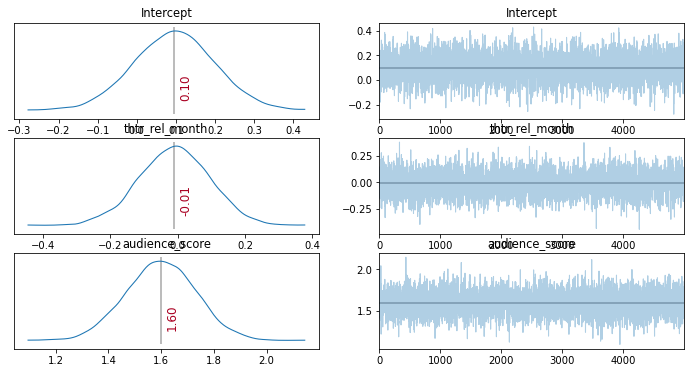

In [152]:
plot_traces(trace_VI)

<ipython-input-153-f8bc959d6a08>:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.plots.forestplot(trace_VI, figsize=(12, 5))
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


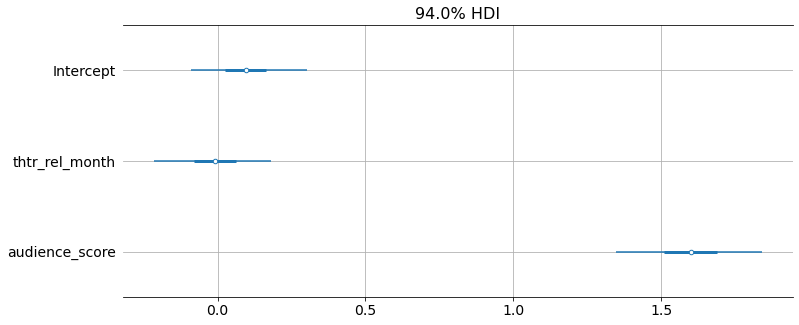

In [153]:
pm.plots.forestplot(trace_VI, figsize=(12, 5))
plt.grid() 

In [154]:
pm.summary(trace_VI).round(2)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/homebrew/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
arviz - WARNING - Shape validation failed: input_shape: (1, 5000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.10,0.10,-0.09,0.30,0.0,0.0,4717.0,4632.0,NaN
thtr_rel_month,-0.01,0.10,-0.22,0.18,0.0,0.0,4829.0,4943.0,NaN
audience_score,1.60,0.13,1.35,1.84,0.0,0.0,5115.0,5067.0,NaN


In [156]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
from math import comb
sns.set_theme(style="ticks")

In [172]:
from mpmath import mp
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
from statsmodels.tools import add_constant
from itertools import combinations
mp.dps = 50

#This class is based on the BMA class provided by Bill Basener in: https://www.kaggle.com/billbasener/bayesian-model-averaging-logistic-regression
#It has been modified to allow for multinomial regression (logistic regression for more than 2 categories)
#Specifically, I've hardcoded the model as a 3 category multinomial regression, so this code doesn't generalize to any other model
class BMA_Wine:
    
    def __init__(self, y, X, **kwargs):
        # Setup the basic variables.
        self.y = y
        self.X = X
        self.names = list(X.columns)
        self.nRows, self.nCols = np.shape(X)
        self.likelihoods = mp.zeros(self.nCols,1)
        self.likelihoods_all = {}
        self.coefficients_mp = mp.zeros(self.nCols,2)
        self.coefficients = np.zeros((self.nCols, 2))
        self.probabilities = np.zeros(self.nCols)
        # Check the max model size. (Max number of predictor variables to use in a model.)
        # This can be used to reduce the runtime but not doing an exhaustive sampling.
        if 'MaxVars' in kwargs.keys():
            self.MaxVars = kwargs['MaxVars']
        else:
            self.MaxVars = self.nCols  
        # Prepare the priors if they are provided.
        # The priors are provided for the individual regressor variables.
        # The prior for a model is the product of the priors on the variables in the model.
        if 'Priors' in kwargs.keys():
            if np.size(kwargs['Priors']) == self.nCols:
                self.Priors = kwargs['Priors']
            else:
                print("WARNING: Provided priors error.  Using equal priors instead.")
                print("The priors should be a numpy array of length equal tot he number of regressor variables.")
                self.Priors = np.ones(self.nCols)  
        else:
            self.Priors = np.ones(self.nCols)  
        if 'Verbose' in kwargs.keys():
            self.Verbose = kwargs['Verbose'] 
        else:
            self.Verbose = False 
        if 'RegType' in kwargs.keys():
            self.RegType = kwargs['RegType'] 
        else:
            self.RegType = 'LS' 
        
    def fit(self):
        # Perform the Bayesian Model Averaging
        
        # Initialize the sum of the likelihoods for all the models to zero.  
        # This will be the 'normalization' denominator in Bayes Theorem.
        likelighood_sum = 0
        
        # To facilitate iterating through all possible models, we start by iterating thorugh
        # the number of elements in the model.  
        max_likelihood = 0
        for num_elements in range(1,self.MaxVars+1): 
            
            if self.Verbose == True:
                print("Computing BMA for models of size: ", num_elements)
            
            # Make a list of all index sets of models of this size.
            Models_current = list(combinations(list(range(self.nCols)), num_elements)) 
             
            # Occam's window - compute the candidate models to use for the next iteration
            # Models_previous: the set of models from the previous iteration that satisfy (likelihhod > max_likelihhod/20)
            # Models_next:     the set of candidate models for the next iteration
            # Models_current:  the set of models from Models_next that can be consturcted by adding one new variable
            #                    to a model from Models_previous
                                   
            
            # Iterate through all possible models of the given size.
            for model_index_set in Models_current:
                
                # Compute the linear regression for this given model. 
                model_X = self.X.iloc[:,list(model_index_set)]

                model_regr = sm.MNLogit(self.y, model_X).fit(disp=0)
                
                # Compute the likelihood (times the prior) for the model. 
                model_likelihood = mp.exp(-model_regr.bic/2)*np.prod(self.Priors[list(model_index_set)])
                
                if self.Verbose == True:
                    pass
                    #print("Model Variables:",model_index_set,"likelihood=",model_likelihood)
                self.likelihoods_all[str(model_index_set)] = model_likelihood
                
                # Add this likelihood to the running tally of likelihoods.
                likelighood_sum = mp.fadd(likelighood_sum, model_likelihood)
                # Add this likelihood (times the priors) to the running tally
                # of likelihoods for each variable in the model.
                for idx, i in zip(model_index_set, range(num_elements)):
                    self.likelihoods[idx] = mp.fadd(self.likelihoods[idx], model_likelihood, prec=2000)
                    for j in np.arange(model_regr.params.shape[1]):

                        self.coefficients_mp[idx,j] = mp.fadd(self.coefficients_mp[idx,j], model_regr.params[j][i]*model_likelihood, prec=2000)
                max_likelihood = np.max([max_likelihood,model_likelihood]) # get the new max likelihood if it is this model
                
                    

        # Divide by the denominator in Bayes theorem to normalize the probabilities 
        # sum to one.
        self.likelighood_sum = likelighood_sum
        for idx in range(self.nCols):
            self.probabilities[idx] = mp.fdiv(self.likelihoods[idx],likelighood_sum, prec=1000)
            for j in range(2):
                self.coefficients[idx,j] = mp.fdiv(self.coefficients_mp[idx,j],likelighood_sum, prec=1000)
        
        # Return the new BMA object as an output.
        return self

    
    
 
    def predict_MAP(self,true_class, data):
        data = np.asarray(data)
        result = np.zeros((data.shape[0],3))
        temp = sm.MNLogit(true_class, exog=np.asarray(data))
        result = temp.predict(params = self.coefficients, exog = np.asarray(data))
        result = pd.DataFrame(result, columns= [0, 1])
        res_MAP = result.idxmax(axis=1)
        to_return = pd.DataFrame({'TrueClass':true_class, 'MAP':res_MAP})
        return to_return
 
     
    
    def misclass_rate(self, true_class, data):
        maps = self.predict_MAP(true_class, data)
        
        
        maps['Mis_class'] = maps['MAP']  == maps['TrueClass']
        
        mis_class =  1 - maps['Mis_class'].mean()
        
        return mis_class
    def misclass_xtabs(self, true_class, data):
        maps = self.predict_MAP(true_class, data)
        
        xtabs = pd.crosstab(maps['MAP'], maps['TrueClass'])        
        return xtabs
    
    def summary(self):
        # Return the BMA results as a data frame for easy viewing.
        df = pd.DataFrame([self.names, list(self.probabilities), list(self.coefficients)], 
             ["Variable Name", "Probability", "Avg. Coefficient"]).T
        return df  

In [175]:
df_clean

,critics_score,audience_score,imdb_rating,thtr_rel_month,good_or_bad
0,-0.447063,0.526423,-0.916206,-0.771619,0
1,1.349904,0.922324,0.744444,-1.053191,1
2,1.173731,1.417200,1.021219,0.354668,1
3,0.786150,0.674886,0.652185,0.917811,1
4,-0.869879,-1.750006,-1.285239,0.636240,0
...,...,...,...,...,...
646,-0.482298,-1.799493,-0.547173,0.073096,0
647,-1.010818,0.922324,0.190894,-1.616334,0
648,0.786150,-0.512816,-0.547173,-1.053191,1
649,-0.940349,-1.403593,-0.639431,-0.208476,0


In [176]:
X = df_clean[['audience_score', 'thtr_rel_month']]

y = df_clean["good_or_bad"]


In [177]:
BMA = BMA_Wine(y, X); BMA_fit = BMA.fit()

In [178]:
BMA.summary()

,Variable Name,Probability,Avg. Coefficient
0,audience_score,1.0,"[1.6166885995666453, 0.0]"
1,thtr_rel_month,0.038362,"[-0.0007066006689544737, 0.0]"


In [179]:
BMA.misclass_rate(y, X)

ValueError: Shape of passed values is (651, 3), indices imply (651, 2)

In [171]:
BMA.misclass_xtabs(y,X)

TrueClass,Certified Fresh,Fresh,Rotten
MAP,,,
Certified Fresh,10,66,222
Rotten,125,143,85
